### Data Science Problem

We need to be able to predict the price of houses accurately to gauge which houses our agents will be able to make the most commission off of. Create a model that identifies the features that increase the price of houses the most so our team can quickly assess if a house is worth our time.

### Import Libraries

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [6]:
#want to toggle rows/columns size
pd.set_option("display.max_columns", 10)
pd.set_option('display.max_rows', None)

In [7]:
train_df = pd.read_csv('../datasets/train.csv')
test_df = pd.read_csv('../datasets/test.csv')

In [8]:
train_df.shape

(2051, 81)

In [9]:
train_df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,...,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,...,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,...,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,...,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,...,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,...,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,...,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,...,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [10]:
train_df.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [11]:
train_df.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [12]:
test_df.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              820
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

In [13]:
train_df.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [14]:
len(test_df.columns)
len(train_df.columns)

81

In [15]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,...,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,...,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,...,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,...,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,...,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,...,0,3,2010,WD,138500


In [16]:
train_df['Lot Config'].value_counts()

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64

In [17]:
train_df['Alley'].fillna(value = 'none', inplace = True)
test_df['Alley'].fillna(value = 'none', inplace = True)

In [18]:
train_df['Pool QC'].fillna(value = 'none', inplace = True)
test_df['Pool QC'].fillna(value = 'none', inplace = True)

In [19]:
train_df['Fireplace Qu'].fillna(value = 'none', inplace = True)
test_df['Fireplace Qu'].fillna(value = 'none', inplace = True)

In [20]:
##dropping lot frontage, it has a lot of nan values that I dont want to deal with.
train_df = train_df.drop(axis = 1, columns = ['Lot Frontage'])
test_df = test_df.drop(axis = 1, columns = ['Lot Frontage'])

In [21]:
train_df['Misc Feature'].fillna(value = 'none', inplace = True)
test_df['Misc Feature'].fillna(value = 'none', inplace = True)

In [22]:
train_df['Garage Type'].fillna(value = 'none', inplace = True)
test_df['Garage Type'].fillna(value = 'none', inplace = True)

In [23]:
train_df['Bsmt Qual'].fillna(value = 'none', inplace = True)
test_df['Bsmt Qual'].fillna(value = 'none', inplace = True)

In [24]:
train_df['Fence'].fillna(value = 'none', inplace = True)
test_df['Fence'].fillna(value = 'none', inplace = True)

In [25]:
train_df['Mas Vnr Area'].fillna(value = 0, inplace = True)
test_df['Mas Vnr Area'].fillna(value = 0, inplace = True)

In [26]:
train_df.loc[train_df['Total Bsmt SF'].isnull()]
train_df.drop(index = 1327, inplace = True)

In [27]:
train_df['Alley'].fillna(value = 'none', inplace = True)
test_df['Alley'].fillna(value = 'none', inplace = True)

As of now I have cleaned the columns I would consider using.

In [28]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,...,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,9142,...,none,0,4,2006,WD
1,2718,905108090,90,RL,9662,...,none,0,8,2006,WD
2,2414,528218130,60,RL,17104,...,none,0,9,2006,New
3,1989,902207150,30,RM,8520,...,none,0,7,2007,WD
4,625,535105100,20,RL,9500,...,none,0,7,2009,WD


### Columns I want to add

MS SubClass, MS Zoning, Lot Area, Lot Shape, Land Contour?, Neighborhood, Bldg type, house style, overall quality, overall condition, year built, 

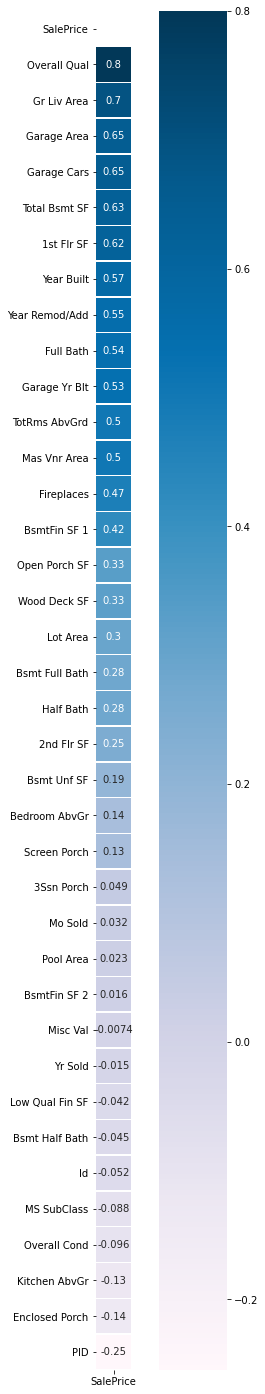

In [29]:
## make a quick heatmap on price
corr = train_df.corr()
corr_price = corr[["SalePrice"]].sort_values(by= "SalePrice", ascending = False)

mask = np.zeros_like(corr_price)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (10,25))

sns.heatmap(corr_price,
           annot = True,
           cmap= "PuBu",
            square = True,
           mask = mask,
           linewidths = .5
           );

In [30]:
train_df.shape

(2050, 80)

In [31]:
train_df.loc[train_df['Wood Deck SF'] > 1000]
train_df.drop(index = 966, inplace = True)

In [32]:
train_df.loc[train_df['Lot Area'] > 100000]
train_df.drop(index = [471, 694], inplace = True)

In [33]:
train_df.loc[train_df['Gr Liv Area'] > 4000]
train_df.drop(index = [960, 1885], inplace = True)

In [34]:
train_df.loc[train_df['1st Flr SF'] > 3000]
train_df.drop(index = [328, 616], inplace = True)

In [35]:
# Dropped NAN for column
train_df.loc[train_df['Garage Cars'].isnull()]
train_df.drop(index = 1712, inplace = True)

In [36]:
train_df.loc[train_df['Total Bsmt SF'].isnull()]
train_df['Total Bsmt SF'].fillna(value = 0, inplace = True)

In [37]:
df_feats = train_df[['Id', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF',
                    '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Mas Vnr Area', 
                     'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Lot Area', 'Yr Sold', 'SalePrice']].copy()
df_feats.set_index('Id', inplace = True)

In [38]:
test_feats = test_df[['Id', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF',
                    '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Mas Vnr Area', 
                     'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Lot Area', 'Yr Sold']].copy()


In [39]:
test_feats.head()

,Id,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,...,TotRms AbvGrd,Fireplaces,Wood Deck SF,Lot Area,Yr Sold
0,2658,6,1928,440,1,...,9,0,0,9142,2006
1,2718,5,1967,580,2,...,10,0,170,9662,2006
2,2414,7,1496,426,2,...,7,1,100,17104,2006
3,1989,5,968,480,2,...,5,0,0,8520,2007
4,625,6,1394,514,2,...,6,2,0,9500,2009


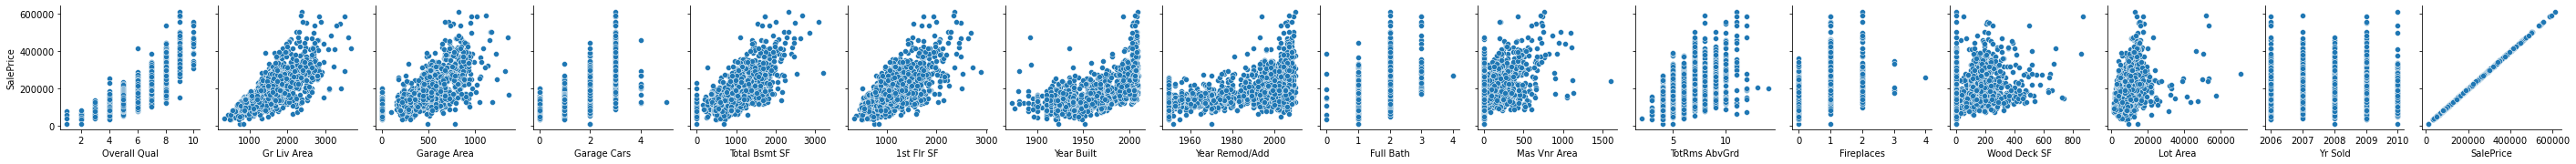

In [40]:
#pair plot to check for outliers

sns.pairplot(data= df_feats,
            y_vars = "SalePrice",
            diag_kind = None);

## looks like there are 2 outliers in lot area, 1 in wood deck sqft, 2 in total bst sf, 2 gr liv area

In [41]:
df_feats.head()

,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,...,Fireplaces,Wood Deck SF,Lot Area,Yr Sold,SalePrice
Id,,,,,,,,,,,
109,6,1479,475.0,2.0,725.0,...,0,0,13517,2010,130500
544,7,2122,559.0,2.0,913.0,...,1,0,11492,2009,220000
153,5,1057,246.0,1.0,1057.0,...,0,0,7922,2010,109000
318,5,1444,400.0,2.0,384.0,...,0,100,9802,2010,174000
255,6,1445,484.0,2.0,676.0,...,0,0,14235,2010,138500


In [42]:
df_feats.columns

Index(['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add',
       'Full Bath', 'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces',
       'Wood Deck SF', 'Lot Area', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [43]:
#creating dummy columns for categorical data
dummy = pd.get_dummies(data = train_df[['Id', 'MS SubClass', 'Lot Shape', 'Neighborhood', 'Bldg Type',
                                           'House Style', 'Garage Type', 'Misc Feature', 'Roof Style',
                                       ]], drop_first = True)
dummy.set_index('Id', inplace= True)

In [44]:
test_dummy = pd.get_dummies(data = test_df[['Id', 'MS SubClass', 'Lot Shape', 'Neighborhood', 'Bldg Type',
                                           'House Style', 'Garage Type', 'Misc Feature', 'Roof Style',
                                           ]], drop_first = True)


In [45]:
test_dummy.head()

,Id,MS SubClass,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,...,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed
0,2658,190,0,0,1,...,1,0,0,0,0
1,2718,90,0,0,0,...,1,0,0,0,0
2,2414,60,0,0,0,...,1,0,0,0,0
3,1989,30,0,0,1,...,1,0,0,0,0
4,625,20,0,0,0,...,1,0,0,0,0


In [46]:
df = pd.merge(df_feats, dummy, on= 'Id')

In [47]:
clean_test_df = pd.merge(test_feats, test_dummy, on= 'Id')

In [48]:
df.head()

,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,...,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed
Id,,,,,,,,,,,
109,6,1479,475.0,2.0,725.0,...,1,0,0,0,0
544,7,2122,559.0,2.0,913.0,...,1,0,0,0,0
153,5,1057,246.0,1.0,1057.0,...,1,0,0,0,0
318,5,1444,400.0,2.0,384.0,...,1,0,0,0,0
255,6,1445,484.0,2.0,676.0,...,1,0,0,0,0


In [49]:
clean_test_df.set_index('Id', inplace = True)


In [50]:
X = df.drop(axis = 1, columns = ['SalePrice'])
y = df['SalePrice']

In [51]:
df.isnull().sum()

Overall Qual            0
Gr Liv Area             0
Garage Area             0
Garage Cars             0
Total Bsmt SF           0
1st Flr SF              0
Year Built              0
Year Remod/Add          0
Full Bath               0
Mas Vnr Area            0
TotRms AbvGrd           0
Fireplaces              0
Wood Deck SF            0
Lot Area                0
Yr Sold                 0
SalePrice               0
MS SubClass             0
Lot Shape_IR2           0
Lot Shape_IR3           0
Lot Shape_Reg           0
Neighborhood_Blueste    0
Neighborhood_BrDale     0
Neighborhood_BrkSide    0
Neighborhood_ClearCr    0
Neighborhood_CollgCr    0
Neighborhood_Crawfor    0
Neighborhood_Edwards    0
Neighborhood_Gilbert    0
Neighborhood_Greens     0
Neighborhood_GrnHill    0
Neighborhood_IDOTRR     0
Neighborhood_Landmrk    0
Neighborhood_MeadowV    0
Neighborhood_Mitchel    0
Neighborhood_NAmes      0
Neighborhood_NPkVill    0
Neighborhood_NWAmes     0
Neighborhood_NoRidge    0
Neighborhood

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .75)

In [53]:
#From Noah's Workflow lesson

#establish baseline model for comparison, this is a naive model
y_train_baseline = [y_train.mean()]*len(y_train)
y_test_baseline = [y_train.mean()]*len(y_test)

In [54]:
lr= LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [55]:
print(f"baseline RMSE - train : {mean_squared_error(y_train, lr.predict(X_train))**.5}")
print(f"baseline RMSE - test : {mean_squared_error(y_test, lr.predict(X_test))**.5}")

y_baseline = [y.mean()]*len(y)
baseline_rmse = mean_squared_error(y, y_baseline, squared = False)
print(baseline_rmse)

baseline RMSE - train : 26282.529327823828
baseline RMSE - test : 29327.690065872466
79079.73066263588


In [56]:
lr.coef_

array([ 1.36510857e+04,  6.12801326e+01,  4.13013976e+01, -1.02476038e+03,
        2.41745240e+01, -4.76627587e+00,  3.77783293e+02,  3.32711504e+02,
       -5.02633251e+03,  3.57937918e+01, -1.83705494e+03,  6.20586915e+03,
        1.81010664e+01,  1.32309282e+00, -1.74562640e+02, -3.31881710e+01,
        4.56330484e+03, -2.88512340e+04, -4.96842213e+02,  7.06125975e+03,
       -4.99703174e+02,  5.61273782e+03, -6.96854831e+03, -9.27517734e+03,
        2.65834269e+04, -5.15287454e+03, -1.06357202e+04,  1.20840412e+04,
        9.77974994e+04,  4.72157958e+01,  1.00857249e+04,  1.33085283e+04,
       -8.44076700e+03, -6.53767948e+03,  1.30266215e+04, -1.93803703e+04,
        9.71834339e+03,  3.26396679e+04, -4.34850161e+03, -7.18583647e+02,
       -7.14266896e+03, -1.51560519e+04,  4.91852114e+03,  4.95597777e+04,
       -2.59159950e+03,  3.34737887e+03, -1.45467111e+03, -1.74739422e+04,
       -2.37277414e+04, -1.48875448e+04,  1.22460126e+04,  6.62121788e+03,
       -2.06424886e+04, -

In [65]:
lr.score(X_test, y_test)

0.8594548459051522

In [ ]:
pd.DataFrame({
    'column' : X.columns,
    'coef' : lr.coef_
})

In [ ]:
# Testing df did not have all of the features that were present in training df, as a result im missing dummy
#columns, Thomaz suggested this code to find and add missing columns
missing = set(df) - set(clean_test_df)

for i in missing:
    clean_test_df[i]= 0

In [ ]:
clean_test_df.drop(columns= ['SalePrice'], inplace = True)
clean_test_df.head()

In [ ]:
X_kaggle = clean_test_df
X_kaggle.shape

In [ ]:
X_kaggle['SalePrice'] = lr.predict(X_kaggle)

In [ ]:
output = X_kaggle[["SalePrice"]]
output.head()

In [ ]:
output.to_csv('./datasets/JS_first_submission.csv')

In [ ]:
#Linear Regression wasnt very good because a lot of variables are not independent, so I'll try ridge regression

In [ ]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [ ]:
## using lesson 4.02 for this
ridge = Ridge(alpha = 9.7)
ridge.fit(Z_train, y_train)
# Evaluate model using R2.
print(ridge.score(Z_train, y_train))
print(ridge.score(Z_test, y_test))

pred_ridge = ridge.predict(Z_test)
(mean_squared_error(y_test, pred_ridge))**.5

In [ ]:
r_alphas =  np.logspace(0,3, 150)
ridge_cv = RidgeCV(alphas = r_alphas, scoring = 'r2', cv = 5)
ridge_cv.fit(Z_train, y_train)
ridge_cv.alpha_

In [ ]:
clean_test_df.columns

In [ ]:
clean_test_df.drop(['SalePrice'], axis = 1, inplace = True)

In [ ]:
r_kaggle = clean_test_df
r_kaggle.head()

In [ ]:
r_kaggle.columns

In [ ]:
ksc = StandardScaler()
kaggle_sc = ksc.fit_transform(r_kaggle)

In [ ]:
pd.DataFrame({
    'column' : X.columns,
    'coef' : ridge.coef_
})

In [ ]:
r_kaggle['SalePrice'] = ridge.predict(kaggle_sc)

In [ ]:
output = r_kaggle[["SalePrice"]]
output.head()

In [ ]:
output.to_csv('./datasets/JS_ridge5_submission.csv')

### Below is my attempt at using poly features to improve my ridge regression, it was unfruitful

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_poly = poly.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, train_size = .75)

In [ ]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [ ]:
## using lesson 4.02 for this
ridge = Ridge(alpha = 613)
ridge.fit(Z_train, y_train)
# Evaluate model using R2.
print(ridge.score(Z_train, y_train))
print(ridge.score(Z_test, y_test))

pred_ridge = ridge.predict(Z_test)
(mean_squared_error(y_test, pred_ridge))**.5

In [ ]:
ridge_alphas = np.logspace(0, 3, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas = ridge_alphas, scoring = 'r2', cv = 5)
# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train)

In [ ]:
ridge_cv.alpha_

In [ ]:
X_test = clean_test_df

In [ ]:
X_poly.shape

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
test_poly = poly.fit_transform(X_test)

In [ ]:
ksc = StandardScaler()
kaggle_sc = ksc.fit_transform(test_poly)


In [ ]:
test_poly.shape

In [ ]:
r_kaggle['SalePrice'] = ridge.predict(kaggle_sc)

In [ ]:
output = r_kaggle[["SalePrice"]]
output.head()

In [ ]:
output.to_csv('./datasets/JS_poly_ridge2_submission.csv')